<a href="https://colab.research.google.com/github/VIDIPKUMAR/NewStockmodel/blob/main/newstockpred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
import yfinance as yf
import datetime as dt

stock = "POWERGRID.NS"
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2024, 11, 1)

df = yf.download(stock, start, end)

/tmp/ipython-input-2-2487901451.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed


In [6]:
df.head()
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
Date,,,,,
2024-10-25,307.732239,313.286633,305.247396,313.286633,12979410
2024-10-28,310.168365,312.263463,302.811258,306.465456,9610615
2024-10-29,312.360901,312.994319,306.124408,308.024603,15856332
2024-10-30,310.314575,317.087006,308.657993,310.411997,14498110
2024-10-31,312.604523,314.456007,309.729904,312.214747,9900390


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4208 entries, 2007-10-05 to 2024-10-31
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (Close, POWERGRID.NS)   4208 non-null   float64
 1   (High, POWERGRID.NS)    4208 non-null   float64
 2   (Low, POWERGRID.NS)     4208 non-null   float64
 3   (Open, POWERGRID.NS)    4208 non-null   float64
 4   (Volume, POWERGRID.NS)  4208 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 197.2 KB


In [8]:
df.isnull().sum()

,,0
Price,Ticker,
Close,POWERGRID.NS,0
High,POWERGRID.NS,0
Low,POWERGRID.NS,0
Open,POWERGRID.NS,0
Volume,POWERGRID.NS,0


In [9]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
count,4208.000000,4208.000000,4208.000000,4208.000000,4.208000e+03
mean,79.255945,80.286305,78.238144,79.292803,1.188963e+07
std,63.621687,64.365266,62.829875,63.603316,2.061999e+07
min,18.908405,20.212433,16.952364,20.114630,0.000000e+00
25%,36.349704,36.923188,35.812883,36.386938,4.799653e+06
50%,55.232332,55.870069,54.493162,55.338366,8.344398e+06
75%,82.704775,83.691960,81.724074,82.727263,1.362032e+07
max,356.113861,356.893408,348.074624,354.749603,8.552157e+08


In [10]:
df = df.reset_index()

In [11]:
df.columns

MultiIndex([(  'Date',             ''),
            ( 'Close', 'POWERGRID.NS'),
            (  'High', 'POWERGRID.NS'),
            (   'Low', 'POWERGRID.NS'),
            (  'Open', 'POWERGRID.NS'),
            ('Volume', 'POWERGRID.NS')],
           names=['Price', 'Ticker'])

In [12]:
d1 = pd.read_csv("powergrid.csv")

In [13]:
d1.head()

,Price,Date,Adj Close,Close,High,Low,Open,Volume
0,Ticker,NaN,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
1,0,2007-10-05 00:00:00+00:00,32.9260368347168,56.5875129699707,61.59376525878906,46.77188491821289,50.51251220703125,855215656
2,1,2007-10-08 00:00:00+00:00,31.240449905395508,53.69063949584961,58.50001525878906,53.3531379699707,58.50001525878906,126671715
3,2,2007-10-09 00:00:00+00:00,33.367889404296875,57.34688949584961,57.8531379699707,50.8218879699707,53.7187614440918,116725709
4,3,2007-10-10 00:00:00+00:00,33.678829193115234,57.881263732910156,59.06251525878906,57.37501525878906,58.8375129699707,67931378


In [14]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x = d1['Date'], open = d1['Open'],
                                    high = d1['High'],
                                    low = d1['Low'],
                                    close = d1['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [16]:
df = df.drop(columns=[col for col in ['Date', 'Adj Close'] if col in df.columns])


/tmp/ipython-input-16-3747943799.py:1: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [17]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
0,32.385578,35.250705,26.768000,28.908797,855215656
1,30.727678,33.480131,30.534523,33.480131,126671715
2,32.820171,33.109902,29.085851,30.743759,116725709
3,33.126003,33.802045,32.836272,33.673274,67931378
4,36.828133,38.630909,32.836274,38.630909,106320954


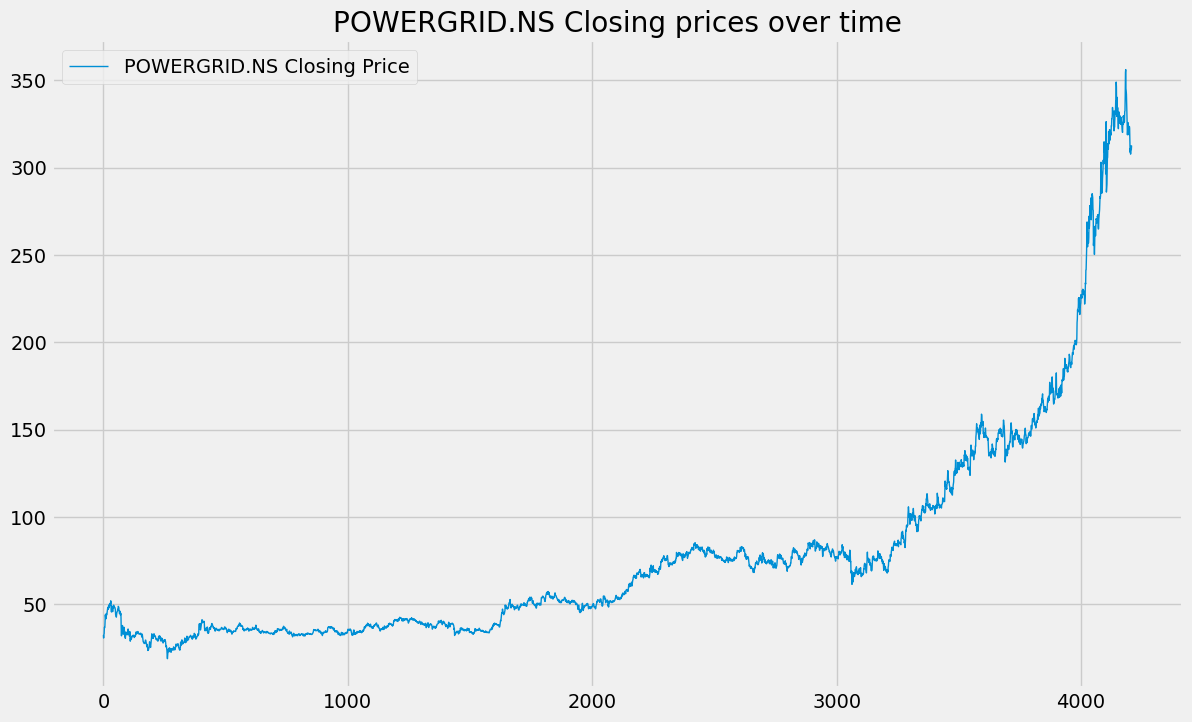

In [20]:
plt.figure(figsize=(13, 8))
plt.plot(df['Close'], label = f'{stock} Closing Price', linewidth = 1)
plt.title(f'{stock} Closing prices over time')
plt.legend()
plt.show()

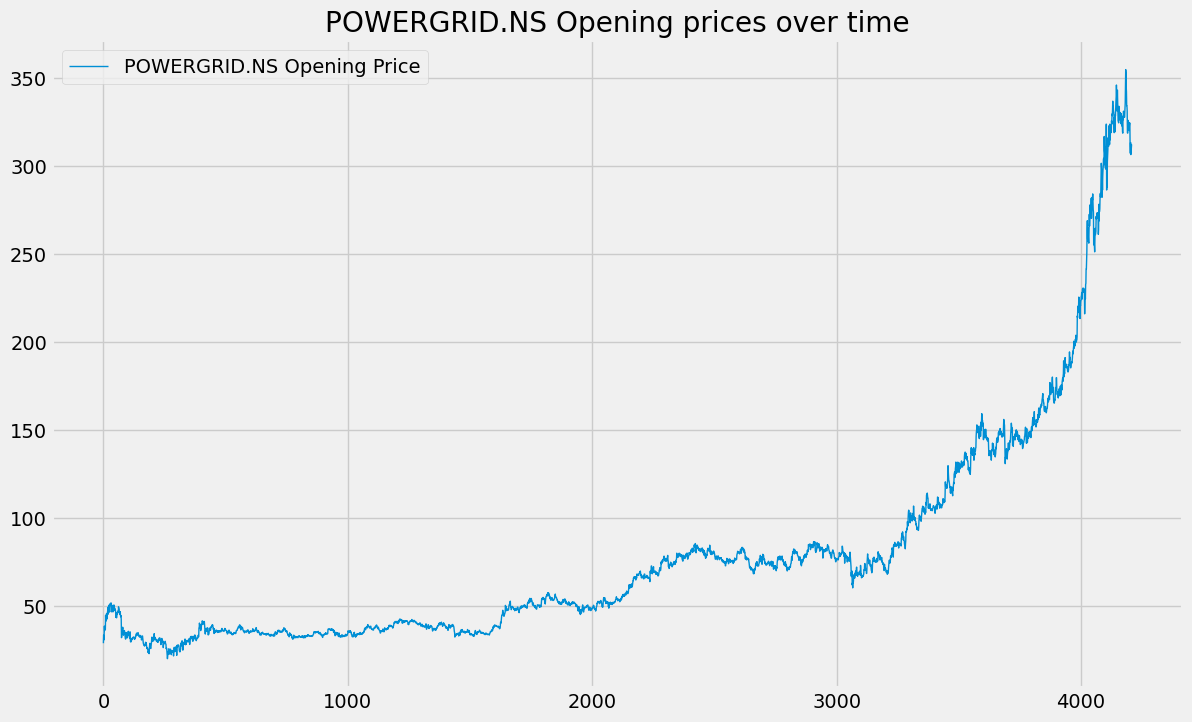

In [21]:
plt.figure(figsize=(13, 8))
plt.plot(df['Open'], label = f'{stock} Opening Price', linewidth = 1)
plt.title(f'{stock} Opening prices over time')
plt.legend()
plt.show()

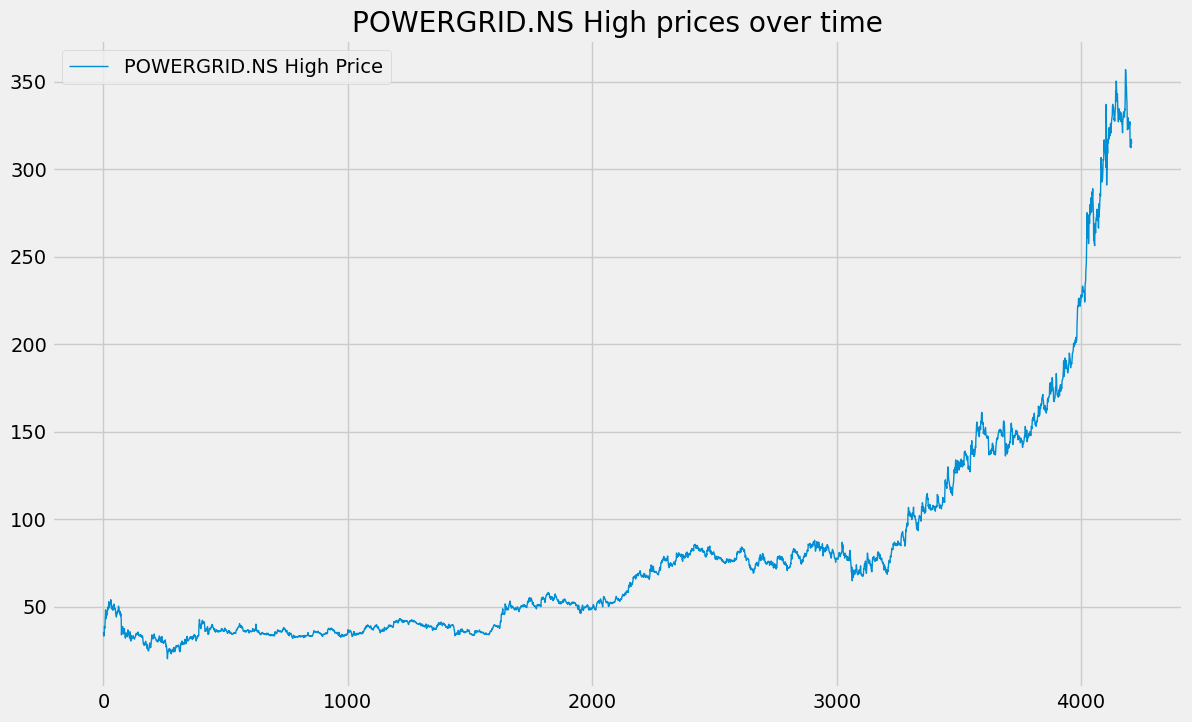

In [23]:
plt.figure(figsize=(13, 8))
plt.plot(df['High'], label = f'{stock} High Price', linewidth = 1)
plt.title(f'{stock} High prices over time')
plt.legend()
plt.show()

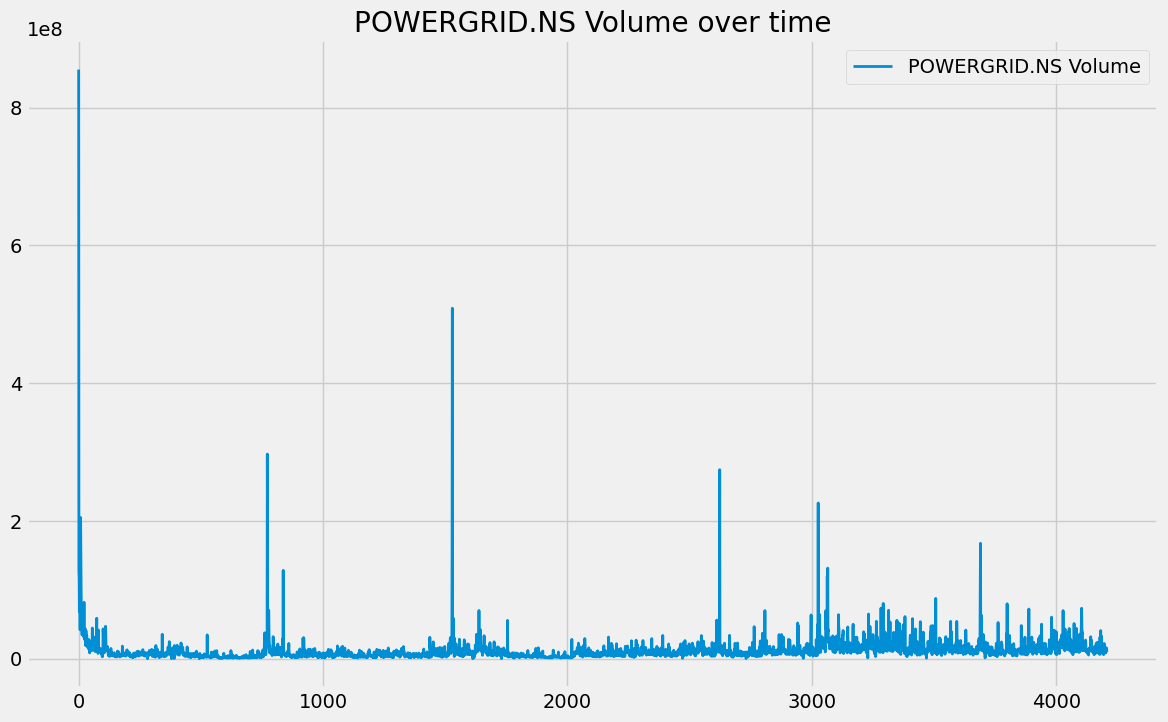

In [24]:
plt.figure(figsize=(13, 8))
plt.plot(df['Volume'], label = f'{stock} Volume', linewidth = 2)
plt.title(f'{stock} Volume over time')
plt.legend()
plt.show()

In [25]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90]
print(sum(temp_data[2:7])/5)

50.0


In [26]:
import pandas as pd
df01 = pd.DataFrame(temp_data)

In [31]:
df01.rolling(5).mean()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0


In [33]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,POWERGRID.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
4203,324.993563
4204,325.235133
4205,325.471086
4206,325.670630


In [34]:
ma200 = df.Close.rolling(200).mean()

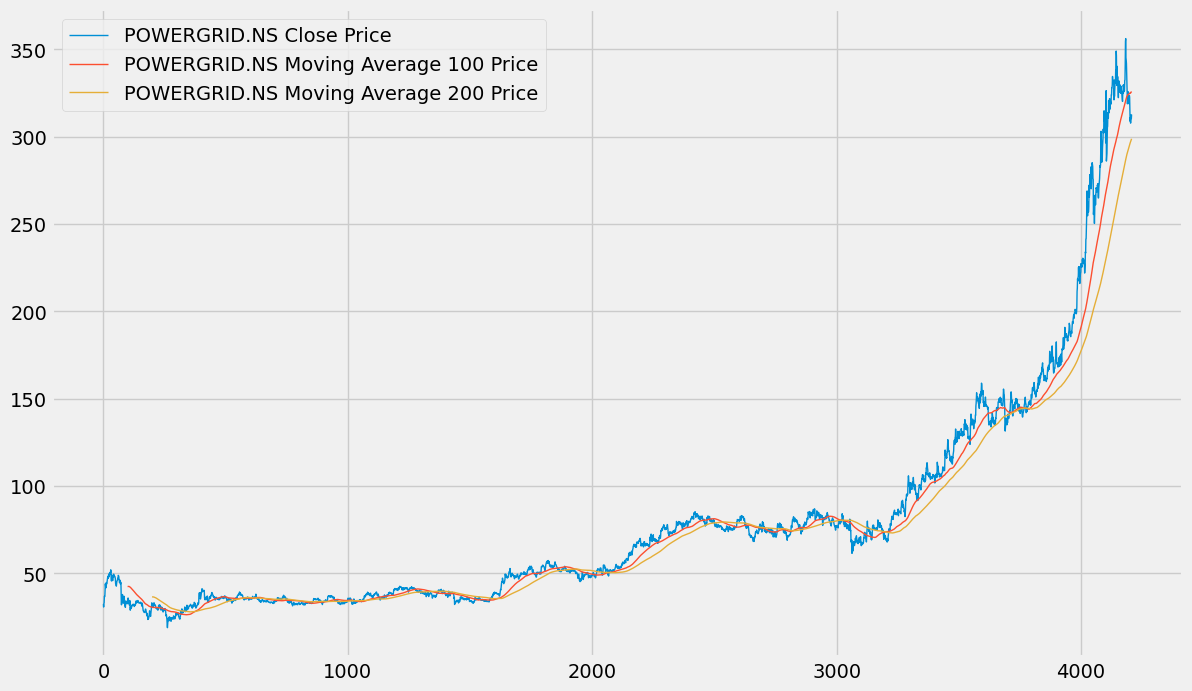

In [35]:
plt.figure(figsize=(13, 8))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ma100, label = f'{stock} Moving Average 100 Price', linewidth = 1)
plt.plot(ma200, label = f'{stock} Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [36]:
ema100 = df.Close.ewm(span=100, adjust = False).mean()

In [38]:
ema200 = df['Close'].ewm(span=200, adjust = False).mean()

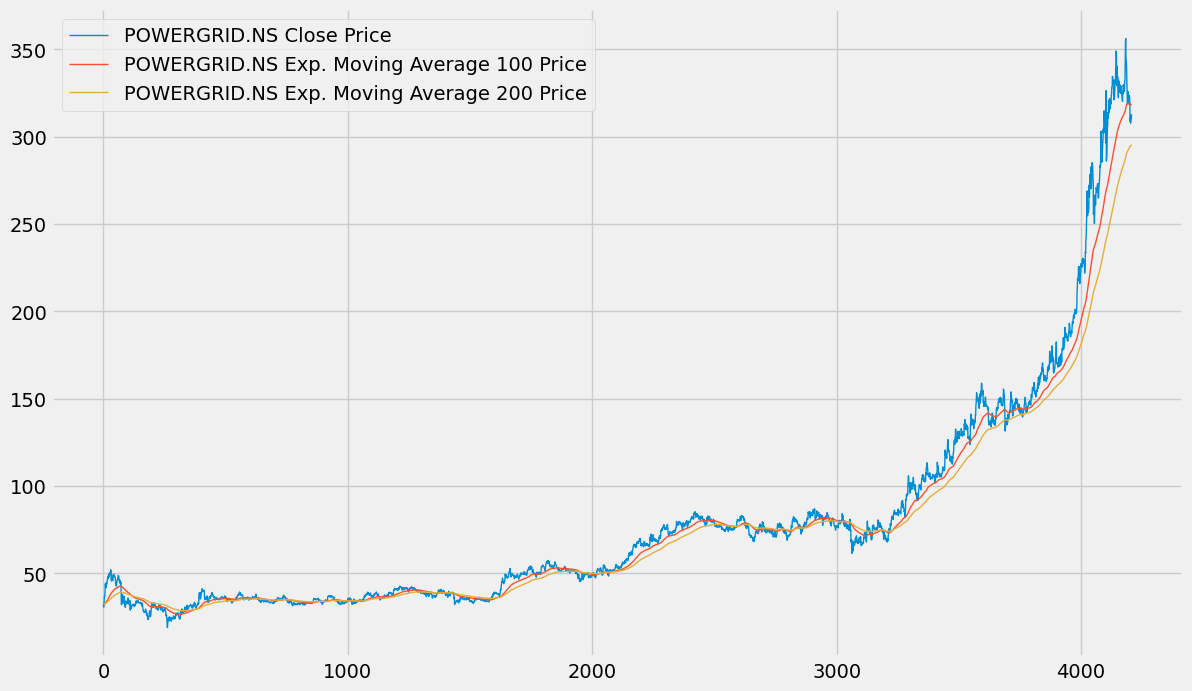

In [39]:
plt.figure(figsize=(13, 8))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ema100, label = f'{stock} Exp. Moving Average 100 Price', linewidth = 1)
plt.plot(ema200, label = f'{stock} Exp. Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [40]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

In [41]:
data_training.shape

(2945, 1)

In [42]:
data_testing.shape

(1263, 1)

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

In [46]:
data_training_array = scaler.fit_transform(data_training)

In [47]:
data_training_array

array([[0.19808607],
       [0.17371844],
       [0.20447368],
       ...,
       [0.90774411],
       [0.86000376],
       [0.8729964 ]])

In [74]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])


In [75]:
x_train = np.array(x_train)

In [76]:
from keras.layers import Dense, Dropout, LSTM
from tensorflow.keras import Sequential,Input

In [77]:
model = Sequential([
    Input(shape=(x_train.shape[1], x_train.shape[2])),  # specify once
    LSTM(50, activation='relu', return_sequences=True),
    Dropout(0.2),
    LSTM(60, activation='relu', return_sequences=True),
    Dropout(0.3),
    LSTM(80, activation='relu', return_sequences=True),
    Dropout(0.4),
    LSTM(120, activation='relu'),
    Dropout(0.5),
    Dense(1)
])


In [79]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

IndexError: tuple index out of range

In [81]:
import numpy as np

print("x_train type:", type(x_train))
print("y_train type:", type(y_train))

# Try to see shapes safely
try:
    print("x_train shape:", np.array(x_train, dtype=object).shape)
except Exception as e:
    print("x_train shape error:", e)

try:
    print("y_train shape:", np.array(y_train, dtype=object).shape)
except Exception as e:
    print("y_train shape error:", e)

x_train type: <class 'numpy.ndarray'>
y_train type: <class 'list'>
x_train shape: (2845, 100, 1)
y_train shape: (2845,)


In [82]:
y_train = np.array(y_train).reshape(-1, 1)

In [83]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 27s 260ms/step - loss: 0.0674 - val_loss: 0.0149
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 39s 235ms/step - loss: 0.0066 - val_loss: 0.0033
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 21s 265ms/step - loss: 0.0054 - val_loss: 0.0050
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 39s 241ms/step - loss: 0.0056 - val_loss: 0.0059
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 21s 260ms/step - loss: 0.0051 - val_loss: 0.0219
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 41s 253ms/step - loss: 0.0054 - val_loss: 0.0047
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 21s 262ms/step - loss: 0.0046 - val_loss: 0.0146
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 41s 257ms/step - loss: 0.0045 - val_loss: 0.0048
Epoch 9/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 40s 243ms/step - loss: 0.0040 - val_loss: 0.0039
Epoch 10/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 21s 253ms/step - loss: 0.0035 - val_loss: 0.0038
Epoch 11/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 21s 268ms/step - loss: 0.0037 - val_loss: 0.0017
Epoch 12/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 41

In [84]:
past_100_days = data_training.tail(100)

In [87]:
import pandas as pd
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [88]:
final_df.head()

Ticker,POWERGRID.NS
0,75.731842
1,77.275719
2,77.539803
3,77.377296
4,77.824203


In [90]:
input_data = scaler.fit_transform(final_df)

In [91]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

x_test, y_test  = np.array(x_test), np.array(y_test)

In [92]:
x_test.shape

(1263, 100, 1)

In [93]:
y_predicted = model.predict(x_test)

40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step


In [94]:
y_predicted.shape

(1263, 1)

In [95]:
scaler.scale_

array([0.00339369])

In [96]:
scaler_factor = 1 / 0.0035166
y_predicted = y_predicted * scaler_factor
y_test = y_test * scaler_factor

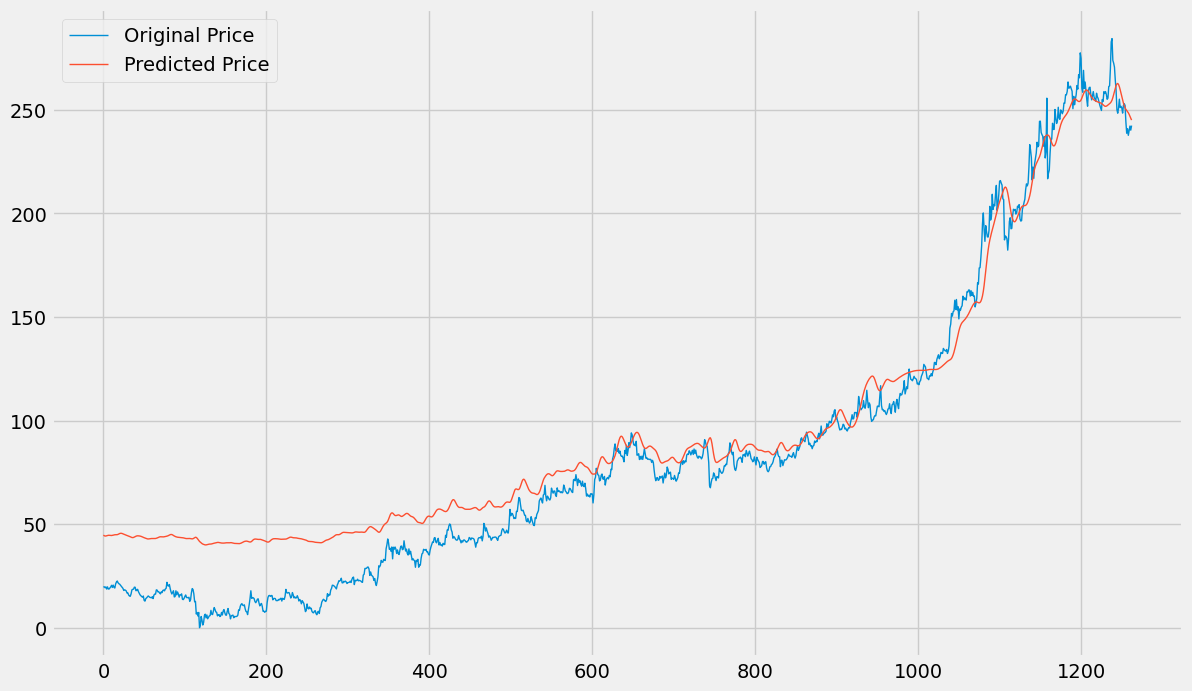

In [97]:
plt.figure(figsize=(13, 8))
plt.plot(y_test, label = 'Original Price', linewidth = 1)
plt.plot(y_predicted, label = 'Predicted Price', linewidth = 1)
plt.legend()
plt.show()

In [99]:
model.save('newstockpred_model.h5')